In [86]:
from scipy.io import wavfile
import IPython.display as ipd
import os
import sys
sys.path.append('../common/')
import utils
import pandas as pd
import scipy

In [6]:
txtin = open('../data/data_aishell/transcript/aishell_transcript_v0.8.txt',encoding='utf-8').read().split("\n")

In [7]:
txtin[:10]

['BAC009S0002W0122 而 对 楼市 成交 抑制 作用 最 大 的 限 购',
 'BAC009S0002W0123 也 成为 地方 政府 的 眼中 钉',
 'BAC009S0002W0124 自 六月 底 呼和浩特 市 率先 宣布 取消 限 购 后',
 'BAC009S0002W0125 各地 政府 便 纷纷 跟进',
 'BAC009S0002W0126 仅 一 个 多 月 的 时间 里',
 'BAC009S0002W0127 除了 北京 上海 广州 深圳 四 个 一 线 城市 和 三亚 之外',
 'BAC009S0002W0128 四十六 个 限 购 城市 当中',
 'BAC009S0002W0129 四十一 个 已 正式 取消 或 变相 放松 了 限 购',
 'BAC009S0002W0130 财政 金融 政策 紧随 其后 而来',
 'BAC009S0002W0131 显示 出 了 极 强 的 威力']

In [8]:
! head '../data/resource_aishell/speaker.info'

0002 M
0003 M
0004 M
0005 M
0006 M
0007 M
0008 M
0009 M
0010 M
0011 M


In [9]:
open('../data/resource_aishell/lexicon.txt',encoding='utf-8').read().split("\n")[:10]

['SIL sil',
 '<SPOKEN_NOISE> sil',
 '啊 aa a1',
 '啊 aa a2',
 '啊 aa a4',
 '啊 aa a5',
 '啊啊啊 aa a2 aa a2 aa a2',
 '啊啊啊 aa a5 aa a5 aa a5',
 '阿 aa a1',
 '阿 ee e1']

In [14]:
ipd.Audio('../data/data_aishell/wav_uncompress/train/S0002/BAC009S0002W0124.wav')

ValueError: could not convert string to float: '../data/data_aishell/wav_uncompress/train/S0002/BAC009S0002W0124.wav'

In [27]:
pb = utils.ProgressBar(worksum=len(txtin))
pb.startjob()
for line in txtin:
    linesp = line.split(' ')
    clipname = linesp[0]
    script = ''.join(linesp[1:])
    with open('../data/transcript/{}.txt'.format(clipname),'w',encoding='utf-8') as whdl:
        whdl.write(script)
    pb.complete(1)

 100.00 % [==================================================>] 141601/141601 	 used:590s eta:0 ss

In [7]:
open('../data/transcript/BAC009S0002W0122.txt',encoding='utf-8').read()

'而对楼市成交抑制作用最大的限购'

In [35]:
traindir = '../data/data_aishell/wav_uncompress/dev/'
peos = os.listdir('../data/data_aishell/wav_uncompress/dev/')

In [36]:
trainwavs = []
traintxts = []
for peo in peos:
    wavs = os.listdir(os.path.join(traindir,peo))
    for wav in wavs:
        trainwavs.append(os.path.join(traindir,peo,wav))
        traintxts.append(os.path.join('../data/transcript/{}'.format(wav.replace('.wav','.txt'))))

In [37]:
len(trainwavs),len(traintxts)

(14331, 14331)

In [38]:
ipd.display(ipd.Audio(trainwavs[1002]))
print(open(traintxts[1002],encoding='utf-8').read())

还在北京奥运会中获得五六公斤级银牌


In [39]:
x,y = [],[]
pb = utils.ProgressBar(worksum=len(trainwavs))
pb.startjob()
for i,j in zip(trainwavs,traintxts):
    if os.path.exists(i) and os.path.exists(j):
        x.append(i)
        y.append(j)
    else:
        pass

In [40]:
trainwavs = x
traintxts = y

In [41]:
len(traintxts),len(trainwavs)

(14326, 14326)

In [42]:
train_dataset = pd.DataFrame({
        'fname':trainwavs,
        'txt':traintxts
    })

In [43]:
train_dataset.to_csv('../data/csvs/dev.csv',header=None,index=None)

In [44]:
len(trainwavs)

14326

# 抽取所有汉字

In [73]:
traintxts[:10]

['../data/transcript/BAC009S0002W0122.txt',
 '../data/transcript/BAC009S0002W0123.txt',
 '../data/transcript/BAC009S0002W0124.txt',
 '../data/transcript/BAC009S0002W0125.txt',
 '../data/transcript/BAC009S0002W0126.txt',
 '../data/transcript/BAC009S0002W0127.txt',
 '../data/transcript/BAC009S0002W0128.txt',
 '../data/transcript/BAC009S0002W0129.txt',
 '../data/transcript/BAC009S0002W0130.txt',
 '../data/transcript/BAC009S0002W0131.txt']

In [50]:
pb = utils.ProgressBar(worksum=len(traintxts))
pb.startjob()
allchinesech = []
for i,val in enumerate(traintxts):
    allchinesech.append(open(val,encoding='utf-8').read())
    if i % 100 == 0:
        pb.complete(100)

 100.52 % [==================================================>] 14400/14326 	 used:424s eta:-2 s

In [51]:
len(allchinesech)

14326

In [52]:
allchinesech[:10]

['广西体育中心内',
 '最终杨医生成功跑完全程',
 '虽然看起来有些艰难',
 '旺季时一天载人行走一零小时',
 '指南明确了中小学生心理辅导室的管理规范',
 '使救援行动更迅捷有效',
 '甚至包括基础科学的创新',
 '教育部医患沟通将纳入临床医学硕士考试项目',
 '从舱内跳出落在梯内时手臂位置不变',
 '配合清晰的使用标示']

In [53]:
alltext = ''.join(allchinesech)

In [56]:
ch2py = lambda x:" ".join([i[0] for i in pinyin(x)])

In [57]:
ch2py(allchinesech[0])

'guǎng xī tǐ yù zhōng xīn nèi'

In [58]:
import pypinyin
from pypinyin import pinyin, lazy_pinyin, Style
allpinyin = ch2py(alltext)

In [59]:
from collections import Counter

In [60]:
pt = Counter(allpinyin)

In [61]:
pt.most_common()

[(' ', 205340),
 ('n', 76220),
 ('g', 46455),
 ('h', 43907),
 ('i', 39590),
 ('u', 26724),
 ('à', 24312),
 ('ì', 19979),
 ('z', 19774),
 ('y', 19669),
 ('s', 19316),
 ('d', 18992),
 ('j', 17337),
 ('ā', 15709),
 ('ī', 13162),
 ('á', 12899),
 ('è', 12801),
 ('ǎ', 12584),
 ('í', 10981),
 ('x', 10822),
 ('é', 10764),
 ('ù', 10457),
 ('o', 10370),
 ('l', 10152),
 ('c', 10141),
 ('b', 9259),
 ('e', 8171),
 ('ǐ', 7718),
 ('w', 7602),
 ('q', 6810),
 ('f', 6572),
 ('ō', 6480),
 ('t', 6332),
 ('ò', 6095),
 ('r', 5845),
 ('m', 5576),
 ('ē', 5520),
 ('ě', 5455),
 ('ǒ', 4946),
 ('ó', 4512),
 ('ǔ', 4264),
 ('ú', 4089),
 ('k', 3694),
 ('ū', 3215),
 ('p', 3187),
 ('ǚ', 331),
 ('ǜ', 330),
 ('ü', 88),
 ('a', 63),
 ('ｔ', 1),
 ('ǘ', 1),
 ('ｃ', 1),
 ('ｋ', 1),
 ('ａ', 1)]

In [64]:
pinyins = [i[0] for i in pt.most_common()]

In [67]:
len(pinyins)

54

In [70]:
py2ind = dict(zip(pinyins,list(range(len(pinyins)))))
ind2py = dict(zip(list(range(len(pinyins))),pinyins))

In [72]:
import pickle
with open('../data/pinyins.pkl','wb') as whdl:
    pickle.dump((py2ind,ind2py),whdl)

In [69]:
ind2py[1]

'n'

In [63]:
allpinyin[:100]

'guǎng xī tǐ yù zhōng xīn nèi zuì zhōng yáng yī shēng chéng gōng pǎo wán quán chéng suī rán kàn qǐ lá'

In [92]:
from collections import Counter
ct = Counter(alltext)

In [93]:
len(ct)

4230

In [94]:
characters = [i[0] for i in ct.most_common()]

In [95]:
ch2ind = dict(zip(characters,list(range(len(characters)))))
ind2ch = dict(zip(list(range(len(characters))),characters))

In [96]:
ind2ch[2],ch2ind['在']

('在', 2)

In [97]:
import pickle

In [98]:
with open('../data/dics.pkl','wb') as whdl:
    pickle.dump((ch2ind,ind2ch),whdl)

In [1]:
import os

In [2]:
files = os.listdir('../data/data_aishell/wav/')

In [4]:
for file in files:
    print(file)
    os.system("tar -xvzf ../data/data_aishell/wav/{} -C ../data/data_aishell/wav_uncompress/".format(file))

S0226.tar.gz
S0711.tar.gz
S0701.tar.gz
S0513.tar.gz
S0206.tar.gz
S0048.tar.gz
S0106.tar.gz
S0110.tar.gz
S0912.tar.gz
S0717.tar.gz
S0738.tar.gz
S0511.tar.gz
S0088.tar.gz
S0030.tar.gz
S0659.tar.gz
S0356.tar.gz
S0664.tar.gz
S0732.tar.gz
S0157.tar.gz
S0102.tar.gz
S0756.tar.gz
ext.sh
S0178.tar.gz
S0718.tar.gz
S0238.tar.gz
S0079.tar.gz
S0520.tar.gz
S0727.tar.gz
S0118.tar.gz
S0722.tar.gz
S0770.tar.gz
S0197.tar.gz
S0105.tar.gz
S0109.tar.gz
S0755.tar.gz
S0704.tar.gz
S0232.tar.gz
S0191.tar.gz
S0598.tar.gz
S0003.tar.gz
S0707.tar.gz
S0159.tar.gz
S0730.tar.gz
S0601.tar.gz
S0137.tar.gz
S0141.tar.gz
S0724.tar.gz
S0599.tar.gz
S0042.tar.gz
S0062.tar.gz
S0180.tar.gz
S0152.tar.gz
S0250.tar.gz
S0769.tar.gz
S0521.tar.gz
S0336.tar.gz
S0213.tar.gz
S0099.tar.gz
S0243.tar.gz
S0007.tar.gz
S0239.tar.gz
S0005.tar.gz
S0156.tar.gz
S0597.tar.gz
S0244.tar.gz
S0077.tar.gz
S0901.tar.gz
S0710.tar.gz
S0020.tar.gz
S0201.tar.gz
S0196.tar.gz
S0183.tar.gz
S0092.tar.gz
S0663.tar.gz
S0081.tar.gz
S0170.tar.gz
S0059.tar.gz
S0422

In [45]:
alltext[:100]

NameError: name 'alltext' is not defined

# 读取文件长度

In [124]:
soundcsv = '../data/csvs/test.csv'

In [125]:
sounddata = pd.read_csv(soundcsv,header=None,index_col=None)
soundfiles = sounddata[0].values

In [126]:
pb = utils.ProgressBar(worksum=len(soundfiles))
pb.startjob()
lengths = []
for onefile in soundfiles:
    try:
        sr,wav = scipy.io.wavfile.read(onefile)
        lengths.append(len(wav))
    except:
        lengths.append(0)
    pb.complete(1)


 100.00 % [==================================================>] 7176/7176 	 used:11s eta:0 s

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a5c0b72e8>]], dtype=object)

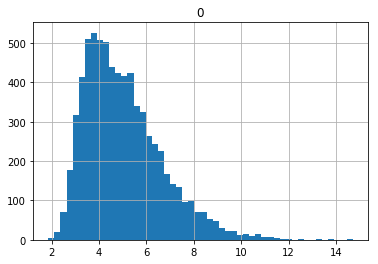

In [127]:
%matplotlib inline
pd.DataFrame([i / sr for i in lengths]).hist(bins=50)

In [128]:
soundpd = pd.DataFrame({
        'files':sounddata[0].values,
        'labels':sounddata[1].values,
        'soundlength':lengths,
    })

In [129]:
soundpd = soundpd.sort_values('soundlength')

In [131]:
soundpd.to_csv('../data/csvs/test_len.csv',header=None,index=None)

# random的正确用法

In [133]:
import random

In [143]:
inds = list(range(100000))

In [144]:
random.shuffle(inds)

In [145]:
inds

[17194,
 12496,
 4288,
 2031,
 57622,
 97177,
 92839,
 52165,
 72133,
 5247,
 39192,
 48746,
 65306,
 42916,
 1692,
 4734,
 54235,
 35409,
 53645,
 7805,
 50184,
 3459,
 389,
 66278,
 62747,
 38099,
 88594,
 60785,
 5060,
 60098,
 9238,
 22488,
 25656,
 34462,
 48103,
 13745,
 62400,
 79030,
 37315,
 21494,
 38805,
 53731,
 44693,
 62664,
 32057,
 83190,
 20311,
 36475,
 69549,
 47083,
 4758,
 63977,
 96154,
 98307,
 16104,
 19112,
 81069,
 58268,
 3231,
 87630,
 54038,
 42073,
 3975,
 96840,
 12187,
 568,
 52373,
 20038,
 94631,
 29938,
 53987,
 49879,
 77559,
 84743,
 91190,
 83380,
 43419,
 83557,
 92393,
 65110,
 19724,
 2776,
 81638,
 88515,
 31130,
 32830,
 6571,
 441,
 89730,
 86652,
 79014,
 78539,
 37328,
 85089,
 18428,
 72114,
 50683,
 74319,
 28914,
 31709,
 82448,
 32943,
 58700,
 45285,
 82952,
 92965,
 2565,
 28623,
 3797,
 51517,
 60509,
 74975,
 37811,
 86726,
 13932,
 67637,
 54230,
 63243,
 1644,
 30141,
 47449,
 84686,
 74697,
 5052,
 97005,
 90206,
 69312,
 20936,


In [146]:
BATCH_SIZE = 64

In [149]:
sorted(inds[:1000])

[159,
 163,
 265,
 389,
 397,
 441,
 537,
 568,
 735,
 827,
 837,
 1249,
 1368,
 1543,
 1567,
 1644,
 1692,
 1965,
 1997,
 2031,
 2098,
 2136,
 2183,
 2417,
 2556,
 2565,
 2642,
 2776,
 2830,
 2930,
 2948,
 3106,
 3231,
 3234,
 3271,
 3459,
 3469,
 3505,
 3531,
 3536,
 3576,
 3706,
 3717,
 3797,
 3858,
 3975,
 4201,
 4288,
 4438,
 4627,
 4734,
 4758,
 4804,
 4827,
 4840,
 4862,
 5052,
 5060,
 5176,
 5189,
 5247,
 5758,
 5785,
 5810,
 6083,
 6128,
 6155,
 6220,
 6267,
 6270,
 6395,
 6417,
 6456,
 6571,
 6794,
 6829,
 6835,
 6872,
 7024,
 7204,
 7214,
 7344,
 7622,
 7674,
 7792,
 7805,
 7806,
 7889,
 8031,
 8122,
 8149,
 8358,
 8385,
 8416,
 8433,
 8561,
 8640,
 8656,
 8671,
 8689,
 8749,
 8906,
 9021,
 9118,
 9179,
 9238,
 9398,
 9461,
 9476,
 9493,
 9500,
 9596,
 9810,
 9968,
 10098,
 10119,
 10138,
 10155,
 10224,
 10413,
 10429,
 10519,
 10545,
 10559,
 10648,
 10743,
 10767,
 10817,
 10825,
 10909,
 11222,
 11743,
 11759,
 11812,
 12048,
 12154,
 12187,
 12267,
 12422,
 12496,
 1261

In [159]:
finalarr = []
for i in range(0,len(inds),BATCH_SIZE):
    onearr = inds[i:i + BATCH_SIZE]
    onearr = sorted(onearr)
    finalarr += onearr

In [161]:
finalarr

[389,
 1692,
 2031,
 3231,
 3459,
 3975,
 4288,
 4734,
 4758,
 5060,
 5247,
 7805,
 9238,
 12496,
 13745,
 16104,
 17194,
 19112,
 20311,
 21494,
 22488,
 25656,
 32057,
 34462,
 35409,
 36475,
 37315,
 38099,
 38805,
 39192,
 42073,
 42916,
 44693,
 47083,
 48103,
 48746,
 50184,
 52165,
 53645,
 53731,
 54038,
 54235,
 57622,
 58268,
 60098,
 60785,
 62400,
 62664,
 62747,
 63977,
 65306,
 66278,
 69549,
 72133,
 79030,
 81069,
 83190,
 87630,
 88594,
 92839,
 96154,
 96840,
 97177,
 98307,
 441,
 568,
 1644,
 2565,
 2776,
 3797,
 5052,
 6571,
 12187,
 13932,
 18428,
 19724,
 20038,
 20936,
 28623,
 28914,
 29938,
 30141,
 31130,
 31709,
 32830,
 32943,
 37328,
 37811,
 43419,
 45285,
 47449,
 49879,
 50683,
 51517,
 52373,
 53987,
 54230,
 58700,
 60509,
 63243,
 65110,
 67637,
 69312,
 72114,
 74319,
 74697,
 74975,
 77559,
 78539,
 79014,
 81638,
 82448,
 82952,
 83380,
 83557,
 84686,
 84743,
 85089,
 86652,
 86726,
 88515,
 89730,
 90206,
 91190,
 92393,
 92965,
 94631,
 97005,


In [162]:
len(set(finalarr))

100000

In [164]:
len(wavfile.read('../data/data_aishell/wav_uncompress/train/S0658/BAC009S0658W0472.wav')[1])

232500